In [0]:
#pandas para o processamento dos dados, nesse caso os dataset's estão em *.csv e pandas lida bem com esse formato
#numpy para toda a algebra linear 
#Matplotlib e Seaborn para plotar os graficos na exploração de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#As bibliotecas do scikit learn ja tem nomes bem sugestivas, basta checar a documentação. Porem são essas libs responsaveis em treinar o modelo
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold



In [0]:
#Começamos transformando os 2 datasets dispibilizados em dataframes para manipularmos e processar os dados
train = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/HousePricingPredict/master/test.csv')


In [0]:
#Essas são as colunas do dataset train
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
Id = test['Id']


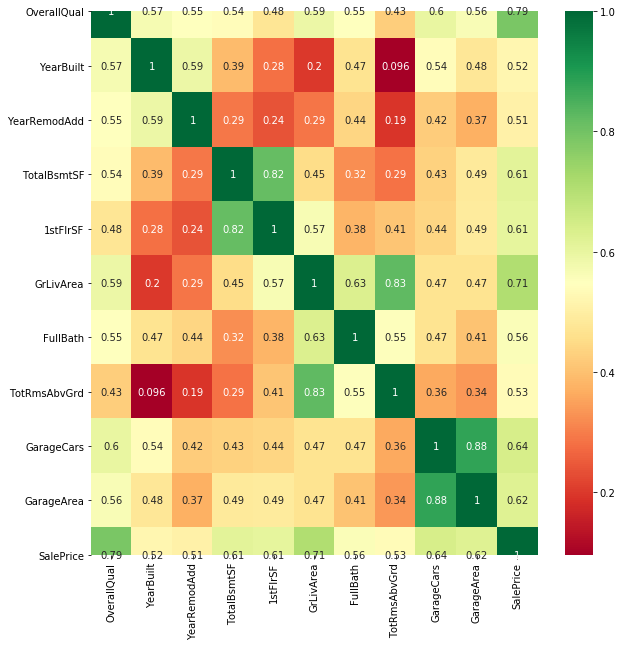

In [0]:
#Matrix de correlação

correlatedMatrix = train.corr()
mostCorrelatedFeatures = correlatedMatrix.index[abs(correlatedMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[mostCorrelatedFeatures].corr(),annot=True,cmap="RdYlGn")


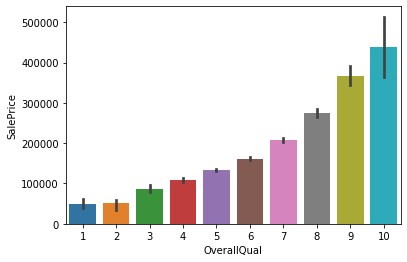

In [0]:
#como podemos notar overallQual tem alta correlação com SalePrice, vejamos como é o grafico
sns.barplot(train.OverallQual,train.SalePrice)

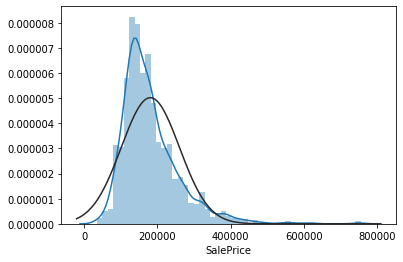

In [0]:
from scipy import stats
from scipy.stats import norm, skew

#vamos plotar o grafico de SalePrice e comparar com a curva normal

sns.distplot(train.SalePrice,fit=norm)

In [0]:
#Mu e sigma da curva normal podem ser encontradas da forma abaixo
(mu,sigma) =norm.fit(train.SalePrice)
print("The parameter mu is {} and the parameter sigma is {}".format(mu,sigma))

The parameter mu is 180921.19589041095 and the parameter sigma is 79415.29188606751


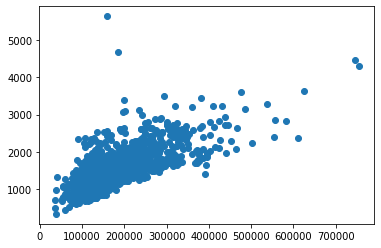

In [0]:
#alguns outliers que devem ser tratados posteriormente
plt.scatter(train.SalePrice,train.GrLivArea)

In [0]:
#Checamos quantos campos nulos temos no dataset train
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [0]:
#Vejamos as correlações do mais correlato ao menos correlato
correlation = train.corr()
correlation.sort_values(["SalePrice"],ascending=False,inplace=True)
correlation.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [0]:
#Agora separaremos de SalePrice em uma variavel Y 
y = train['SalePrice'].copy()

#Excluimos o dado do dataframe train 
train.drop(['SalePrice'],axis=1,inplace=True)

Id = test['Id']

train_index = train.shape[0]
test_index = test.shape[0]

full = pd.concat(objs=[train,test],axis=0).reset_index(drop=True)


In [0]:
#Vamos armazer na variavel categorycalValues todos os nomes de colunas de dados categoricos
categorycalValues = full.select_dtypes(include=['object']).columns

categorycalValues

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [0]:
#Armazenamos em numerical values todos os nomes de colunas numericas
numericalValues = full.select_dtypes(exclude=['object']).columns
numericalValues

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [0]:
#Criamos 2 novos dataframes 

#apenas variveis numericas
Numerical = full[numericalValues]

#apenas variaveis categoricas
Categorycal = full[categorycalValues]

#isso faz com que tratemos cada tipo de dado de forma isolada.

In [0]:
#imprimimos quantos campos tem valores nulos
print(Numerical.isnull().values.sum())

#substituimos esses campos pela media de todos os campos
Numerical = Numerical.fillna(Numerical.mean())

#imprimimos quanto campos com valores nulos sobraram
print(Numerical.isnull().values.sum())

678
0


In [0]:
skewness = Numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146034
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931343
MasVnrArea        2.611549
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.645574
1stFlrSF          1.469604
BsmtFinSF1        1.425233
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162484
BsmtUnfSF         0.919508
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623955
OverallCond       0.570312
BedroomAbvGr      0.326324
GarageArea        0.241218
OverallQual       0.197110
MoSold            0.195884
FullBath          0.167606
YrSold            0.132399
Id                0.000000
GarageCars       -0.218298
GarageYrBlt      -0.392790
YearRemodAdd     -0.451020
YearBuilt        -0.599806
d

In [0]:
skewness = skewness[abs(skewness)>0.5]
skewness.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [0]:
skew_features = train[skewness.index]
skew_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [0]:
#resolvese a skewness de uma feature aplicando uma transformação logaritimica
skew_features = np.log1p(skew_features)


/home/hironu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


In [0]:
Categorycal.shape

(2919, 43)

In [0]:
#transformamos as colunas categoricas em dados numericos atraves do one hot enconding
Categorycal = pd.get_dummies(Categorycal)
Categorycal.shape


(2919, 252)

In [0]:
Categorycal.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [0]:
full = pd.concat([Categorycal, Numerical],axis=1)

In [0]:
#é possivel notar que haviam 43 colunas categoricas que agora foram transforma em 289 novas colunas com dados numericos
#1 ou 0 para cada possibilidade
full.shape

(2919, 289)

In [0]:

train = full.iloc[:train_index]
test = full.iloc[:test_index]

In [0]:

x_train, x_test, y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=0)

In [0]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1022, 289), (438, 289), (1022,), (438,))

In [0]:
n_folds = 5
scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,x_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,x_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [0]:
#regressão linear sem regularização


lr = LinearRegression()
lr.fit(x_train,y_train)
test_pre = lr.predict(x_test)
train_pre = lr.predict(x_train)
print('rmse on train',rmse_CV_train(lr).mean())
print('rmse on train',rmse_CV_test(lr).mean())

rmse on train 286710139.46476483
rmse on train 57196.551796665204


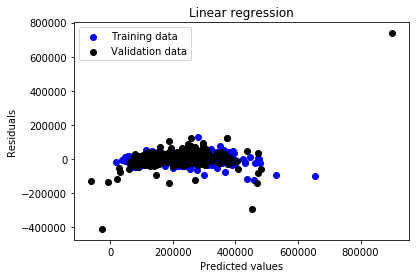

In [0]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [0]:
train.shape, y.shape , test.shape

((1460, 289), (1460,), (1459, 289))

In [0]:
#regressão linear sem regularização



#regressão linear sem regularização

lr = LinearRegression()
mod = lr.fit(train, y)

result = mod.predict(test)


In [0]:
result

array([207798.68274029, 204941.4997122 , 204818.11284893, ...,
       213502.19768629, 276014.5754254 , 142245.09104245])

In [0]:
submission = pd.DataFrame({"Id": Id,
                           "SalePrice":result
                          })

submission.to_csv('./submissionr.csv',index=False)

In [0]:
sub =pd.read_csv("submissionr.csv")
sub.head()

,Id,SalePrice
0,1461,207798.682740
1,1462,204941.499712
2,1463,204818.112849
3,1464,164073.846718
4,1465,291132.817022
